# Task 4- The Sparks Foundation
## NAME: Meghana S Sarode
## Exploring Decision Tree Algorithm
### Iris dataset using Decision Tree classifier

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#collecting the data
#link = 'http://bit.ly/3kXTdox'
#link = 'C:/Users/hp/Downloads/Iris.csv'
data = pd.read_csv('C:/Users/hp/Downloads/Iris.csv')

print('--- Data collection successfull ---')


--- Data collection successfull ---


In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [6]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2


### Statistical description of the dataset

In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
 6   Class          150 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


### Checking for NaN values

In [9]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
Class            0
dtype: int64

In [12]:
print(data.Species.nunique())
print(data.Species.value_counts())

3
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


Since, there are no NaN values in the dataset we can move further 
## Data visualization

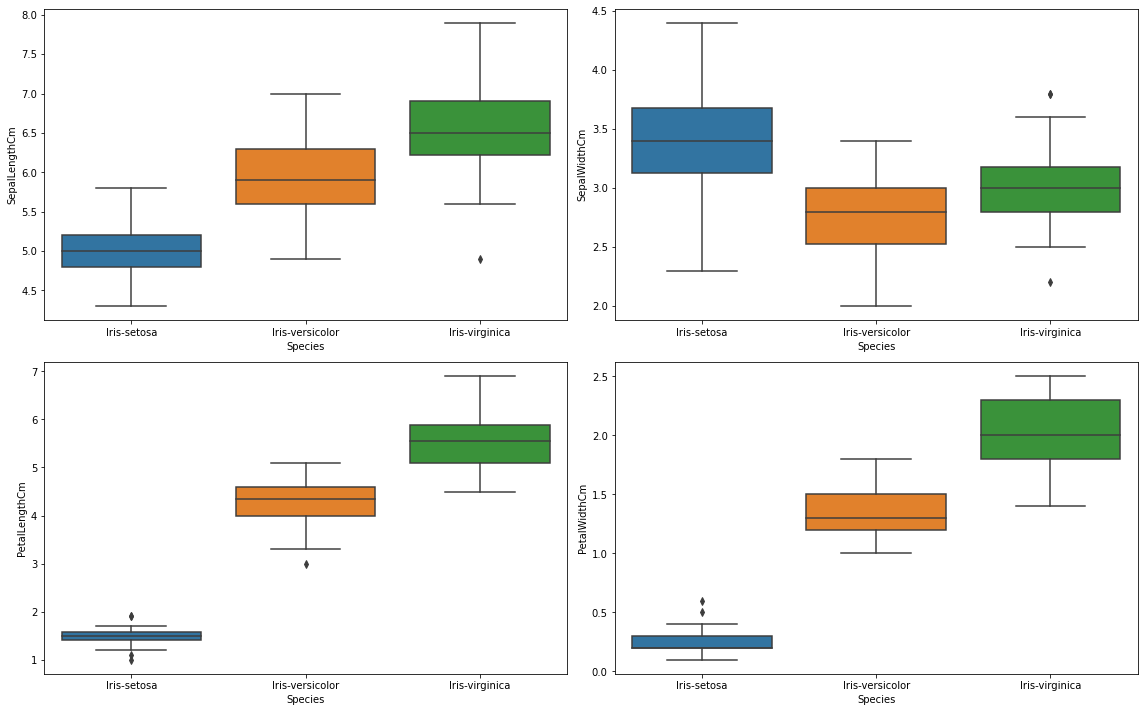

In [10]:
import seaborn as sns

fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
df = data.drop(['Id'], axis=1)
for i in range(4):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['Species'], y = df[df.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
plt.show()

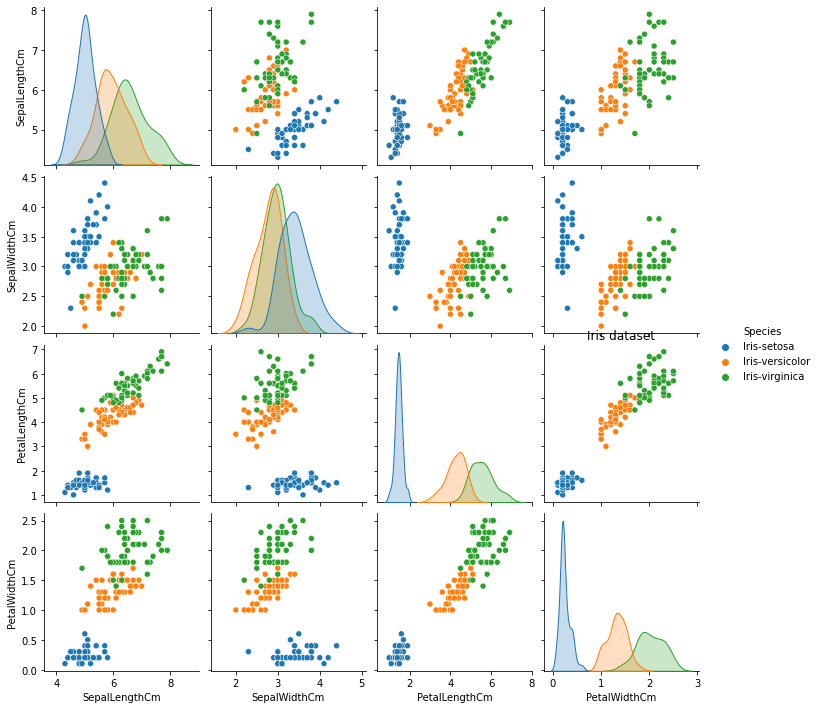

In [11]:
df = data.drop(["Id", "Class"], axis=1)

sns.pairplot(df, hue='Species')
plt.title('Iris dataset')
plt.show()

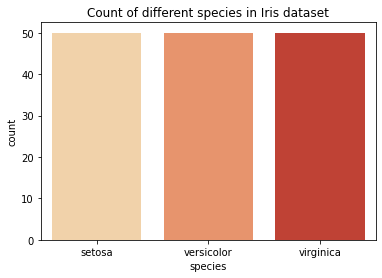

In [13]:
# count plot
iris = sns.load_dataset('iris'); 
sns.countplot(x='species', data=iris, palette="OrRd")
plt.title("Count of different species in Iris dataset")
plt.show()

# Decision Tree Algorithm

In [1]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [22]:
from sklearn.preprocessing import StandardScaler
x = data.iloc[:,1:5].values
y = data.iloc[:,6].values
print(x)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state = 0)

print("X_train size = {}".format(X_train.shape))
print("X_test size = {}".format(X_test.shape))
print("Y_train size = {}".format(Y_train.shape))
print("Y_test size = {}".format(Y_test.shape))

X_train size = (105, 4)
X_test size = (45, 4)
Y_train size = (105,)
Y_test size = (45,)


## GINI criterion

In [24]:
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth = 5, min_samples_leaf = 5)
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

## Entropy criterion

In [26]:
# trainig using entropy

clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth = 5, min_samples_leaf = 5)
clf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=100)

In [27]:
# prediction using gini and entropy

y_pred_g = clf_gini.predict(X_test)
y_pred_e = clf_entropy.predict(X_test)

print("using gini =  \n", y_pred_g)
print("\n using entropy = \n", y_pred_e)

using gini =  
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0
 2 1 1 2 0 2 0 0]

 using entropy = 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0
 2 1 1 2 0 2 0 0]


In [32]:
# accuracy 

res_g = confusion_matrix(Y_test, y_pred_g)
res_e = confusion_matrix(Y_test, y_pred_e)
print("gini_confusion matrix = \n {}".format(res_g))
print("\n entropy  confusion matrix= \n {}".format(res_e))

res_g = accuracy_score(Y_test, y_pred_g)*100
res_e = accuracy_score(Y_test, y_pred_e)*100
print("\n \ngini accuracy = {}".format(res_g))
print("\nentropy  accuracy = {}".format(res_e))

res_g = classification_report(Y_test, y_pred_g)
res_e = classification_report(Y_test, y_pred_e)
print("\n\n\ngini report =\n  {}".format(res_g))
print("\nentropy report = \n {}".format(res_e))

gini_confusion matrix = 
 [[16  0  0]
 [ 0 17  1]
 [ 0  3  8]]

 entropy  confusion matrix= 
 [[16  0  0]
 [ 0 17  1]
 [ 0  3  8]]

 
gini accuracy = 91.11111111111111

entropy  accuracy = 91.11111111111111



gini report =
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      0.94      0.89        18
           2       0.89      0.73      0.80        11

    accuracy                           0.91        45
   macro avg       0.91      0.89      0.90        45
weighted avg       0.91      0.91      0.91        45


entropy report = 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      0.94      0.89        18
           2       0.89      0.73      0.80        11

    accuracy                           0.91        45
   macro avg       0.91      0.89      0.90        45
weighted avg       0.91      0.91      0.91    

In [33]:
from sklearn import tree

text_representation = tree.export_text(clf_gini)
print("Texual representation of the Decision tree implemented(Gini)-- \n")
print(text_representation)

text_representation = tree.export_text(clf_entropy)
print("Texual representation of the Decision tree implemented (Entropy) -- \n")
print(text_representation)

Texual representation of the Decision tree implemented(Gini)-- 

|--- feature_2 <= 2.35
|   |--- class: 0
|--- feature_2 >  2.35
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.55
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.55
|   |   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- feature_3 <= 1.85
|   |   |   |--- class: 2
|   |   |--- feature_3 >  1.85
|   |   |   |--- class: 2

Texual representation of the Decision tree implemented (Entropy) -- 

|--- feature_2 <= 2.35
|   |--- class: 0
|--- feature_2 >  2.35
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.55
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.55
|   |   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- feature_3 <= 1.85
|   |   |   |--- class: 2
|   |   |--- feature_3 >  1.85
|   |   |   |--- class: 2



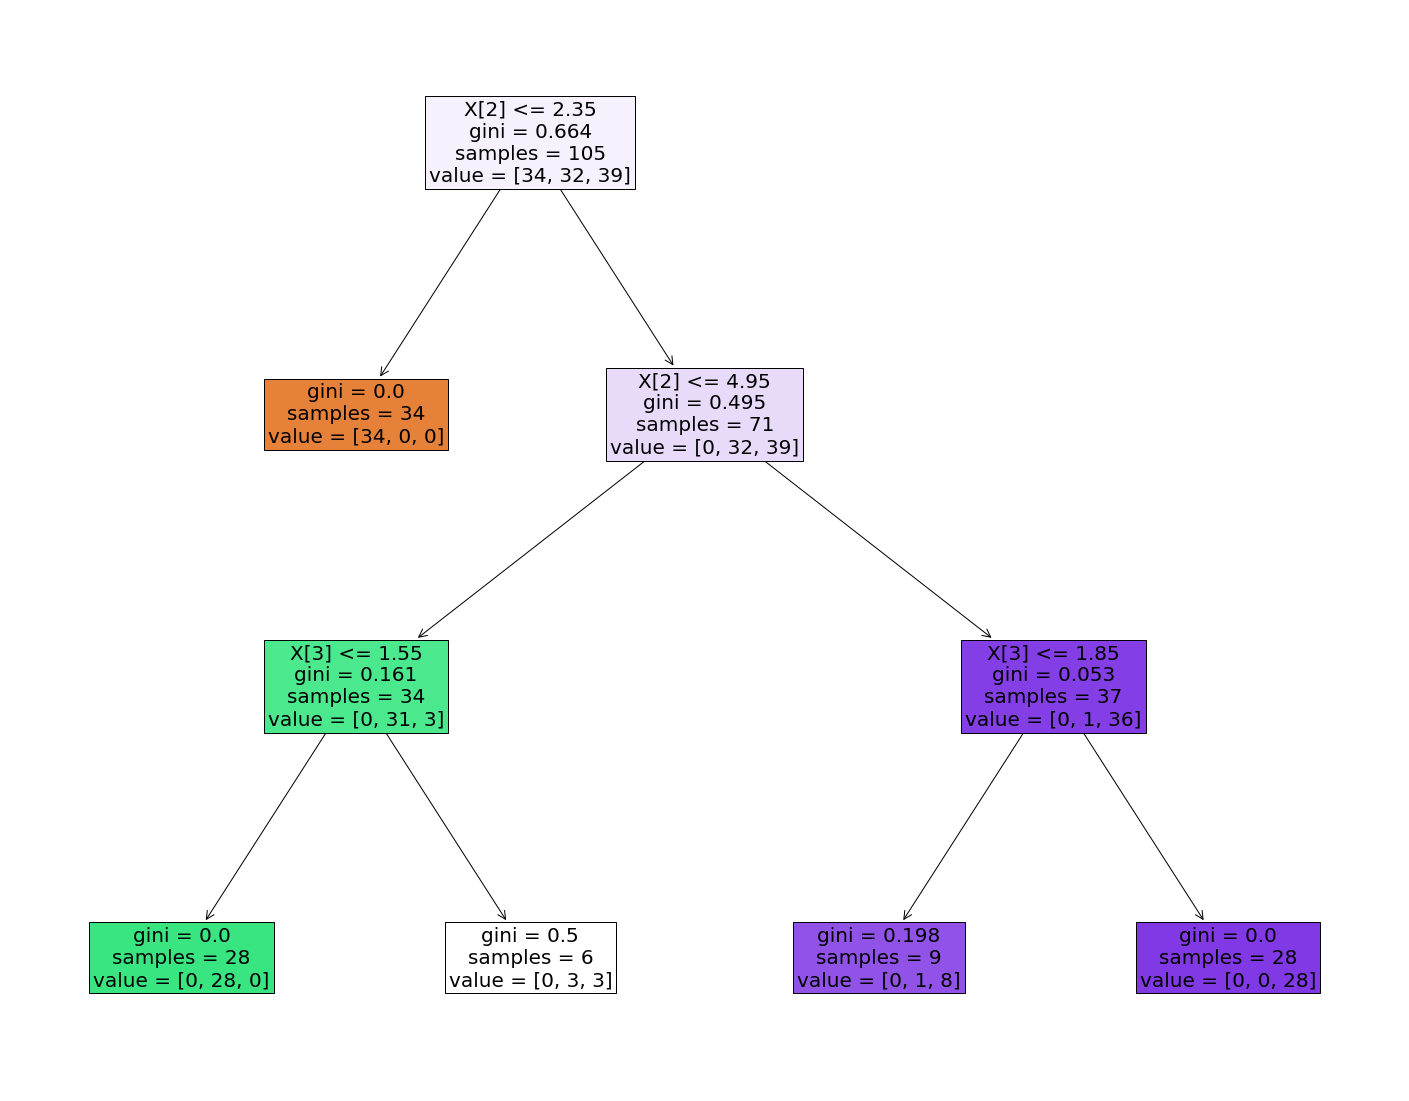

In [44]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_gini, 

                   filled=True, fontsize=20)

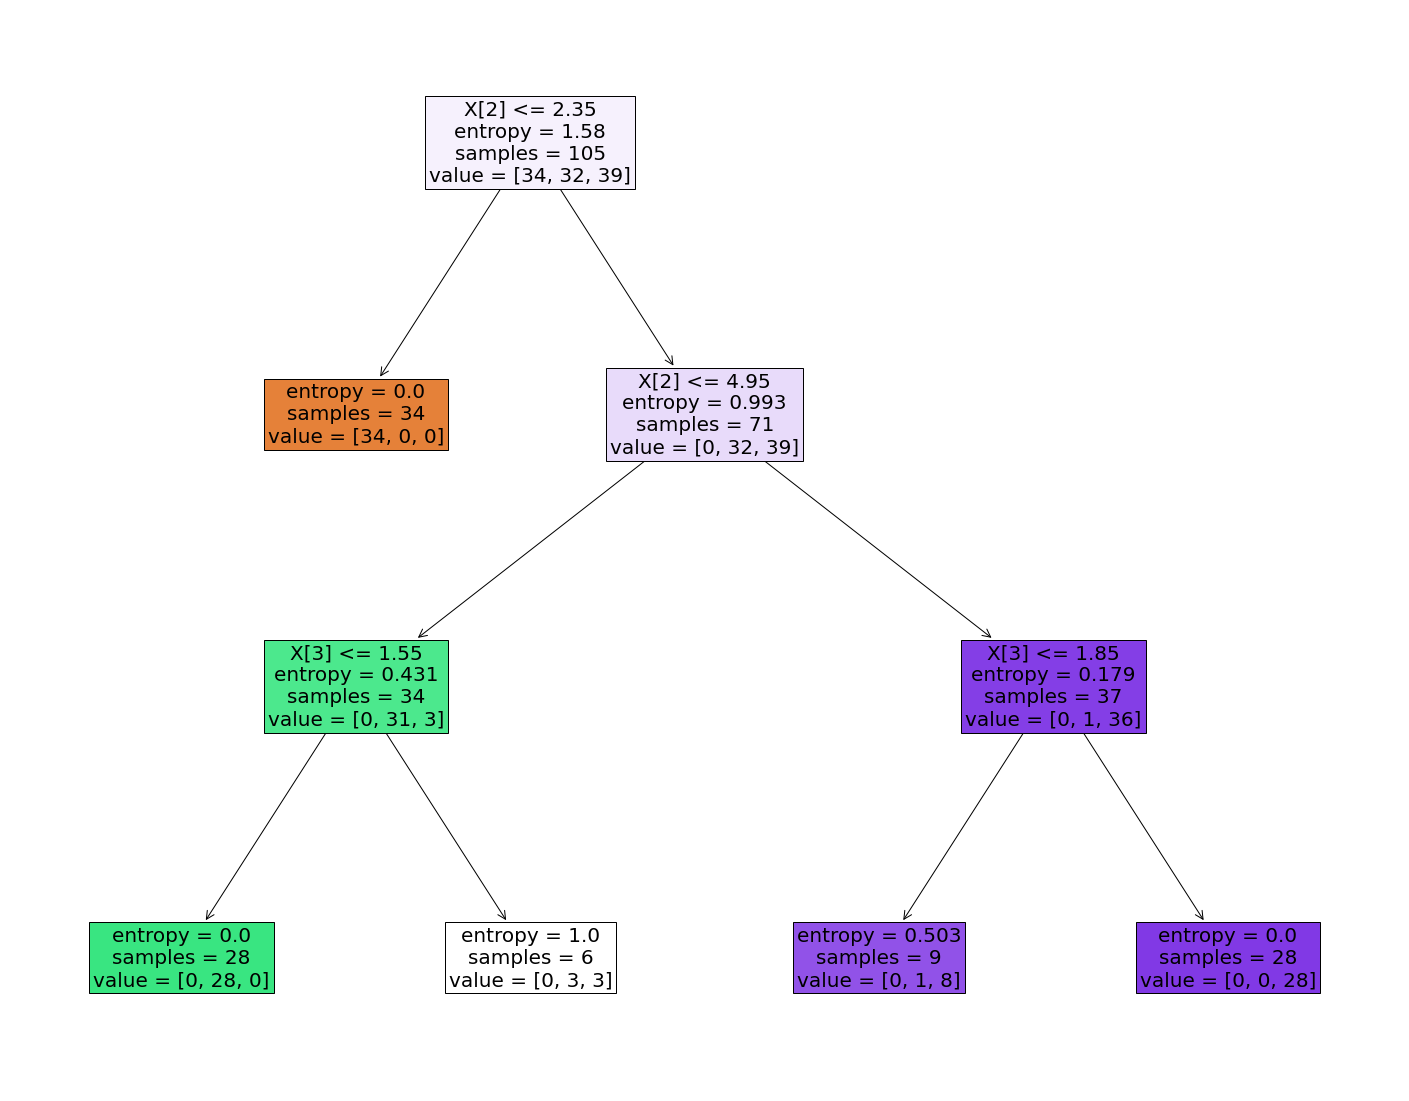

In [43]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_entropy, 
                   filled=True, fontsize=20)

In [38]:
dat = [[5.0,3.4,1.3,0.1]]
pred = clf_gini.predict(dat)
print(pred)

[0]
